In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
class MyRandom():
    def __init__(self, seed=1, method="simple"):
        """Inicializacion"""
        self.r  = seed
        if method=="simple":
            self.a = 57
            self.c = 1
            self.M = 265
        elif method=="drand48":
            self.a = int('5DEECE66D', 16)
            self.c = int('B', 16)
            self.M = 2**48
        else:
            print("Error: Metodo no reconocido")
    def random(self):
        """Calcula un nuevo numero aleatorio y actualiza el estado r"""
        r = (self.a * self.r + self.c)%self.M
        self.r = r
        return r/self.M
            
        

In [58]:
rand = MyRandom(seed=10)
n_points = 1000
r = np.zeros(n_points)
for i in range(n_points):
    r[i] = rand.random()

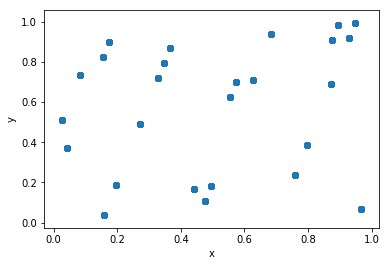

In [59]:
indices = np.arange(n_points)
ii = (indices%2) == 0 # indices pares
plt.scatter(r[ii], r[~ii])
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("correlacion_simple.png")

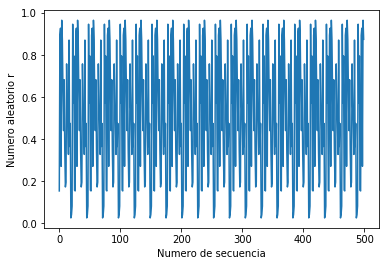

In [60]:
indices = np.arange(n_points)
ii = (indices%2) == 0 # indices pares
plt.plot(r[ii])
plt.xlabel("Numero de secuencia")
plt.ylabel("Numero aleatorio r")
plt.savefig("iteracion_simple.png")

In [61]:
rand = MyRandom(seed=10, method="drand48")
n_points = 1000
r = np.zeros(n_points)
for i in range(n_points):
    r[i] = rand.random()

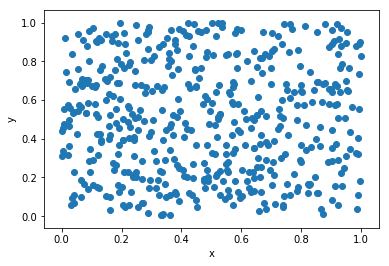

In [62]:
indices = np.arange(n_points)
ii = (indices%2) == 0 # indices pares
plt.scatter(r[ii], r[~ii])
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("correlacion_simple.png")

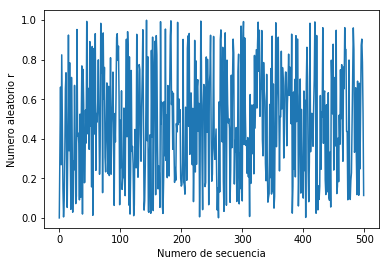

In [63]:
indices = np.arange(n_points)
ii = (indices%2) == 0 # indices pares
plt.plot(r[ii])
plt.xlabel("Numero de secuencia")
plt.ylabel("Numero aleatorio r")
plt.savefig("iteracion_simple.png")

In [98]:
def verifica_momentos(N, k, seed=10, method="simple"):
    rand = MyRandom(seed=seed, method=method)
    r = np.zeros(N)
    for i in range(N):
        r[i] = rand.random()
    d =  np.sqrt(N)*np.abs(np.mean(r**k) - 1.0/(k+1))
    return d

    

In [100]:
print('Mal generador')
for k in [1,3,7]:
    for N in [1E2, 1E4, 1E5]:
        d= verifica_momentos(int(N), int(k), seed=51, method="simple")
        print('k={}, N={}, d={}'.format(k, N, d))

Mal generador
k=1, N=100.0, d=0.23773584905660394
k=1, N=10000.0, d=2.0518867924528283
k=1, N=100000.0, d=6.4955569764507715
k=3, N=100.0, d=0.02792503879041064
k=3, N=10000.0, d=0.27507936618819673
k=3, N=100000.0, d=0.8602394899178785
k=7, N=100.0, d=0.01914480661145565
k=7, N=10000.0, d=0.6358327238772123
k=7, N=100000.0, d=1.9993229156762387


In [101]:
print('Buen generador')
for k in [1,3,7]:
    for N in [1E2, 1E4, 1E5]:
        d= verifica_momentos(int(N), int(k), seed=51, method="drand48")
        print('k={}, N={}, d={}'.format(k, N, d))

Buen generador
k=1, N=100.0, d=0.033277592247686894
k=1, N=10000.0, d=0.31880309884503855
k=1, N=100000.0, d=0.05692145109744037
k=3, N=100.0, d=0.11818085273146817
k=3, N=10000.0, d=0.1310363272664844
k=3, N=100000.0, d=0.08225348695651448
k=7, N=100.0, d=0.2155333050629879
k=7, N=10000.0, d=0.12676004974724459
k=7, N=100000.0, d=0.13957853423749372
